In [88]:
import numpy as np
from time import process_time
import matplotlib.pyplot as plt 

In [4]:

class Result:

    def __init__(self):
        self.x = None
        self.fx = None
        self.dfx = None
        self.points = np.array([])
        self.values = np.array([])
        self.time = None
        self.iterations = 0
        self.func_computations = 0
        self.derivative_computations = 0

    def set(self, x, fx, dfx=None):
        self.x = x
        self.fx = fx
        self.dfx = dfx

    def add_point(self, x, y):
        self.points = np.append(self.points, x)
        self.values = np.append(self.values, y)


In [137]:
def mirror_descent(n, f, g, h, eps=1e-3, max_steps=10000) -> Result:
    time_start = process_time()
    res = Result()
    x = np.ones(n) / n
    res.func_computations += 1
    res.add_point(x, f(x))
    prev_fx = f(x)
    for i in range(max_steps):
        res.iterations += 1
        gx = g(x)
        s = np.sum(x * np.exp(-h * gx))
        x = (x * np.exp(-h * gx)) / s
#         print(x)
        fx = f(x)
        res.add_point(x, fx)
        
        if np.abs(prev_fx - fx) < eps:
            break
        
        prev_fx = fx

    res.set(x, f(x))
    res.time = process_time() - time_start
    return res


In [33]:
def get_c(n):
    return np.random.random_sample(n)

In [104]:
def get_f_g_1(n):
    c = get_c(n)
#     print(f'c = {c}')
    return lambda x: np.transpose(c) @ x, lambda x: c

In [171]:
n = 3
f_1, g_1 = get_f_g_1(n)
x = np.ones(n)
res = mirror_descent(n, f_1, g_1, 0.1)
print(res.points.size)
print(res.x, res.fx)

225
[0.00566186 0.86230146 0.13203668] 0.2575612889410105


In [197]:
def get_f_g_2(n):
    c = get_c(n)
    lambda_ = np.random.random()
    return lambda x: np.transpose(c) @ x + lambda_ * np.sum(x * np.log(x)), lambda x: c + lambda_ * (1 + np.log(x))

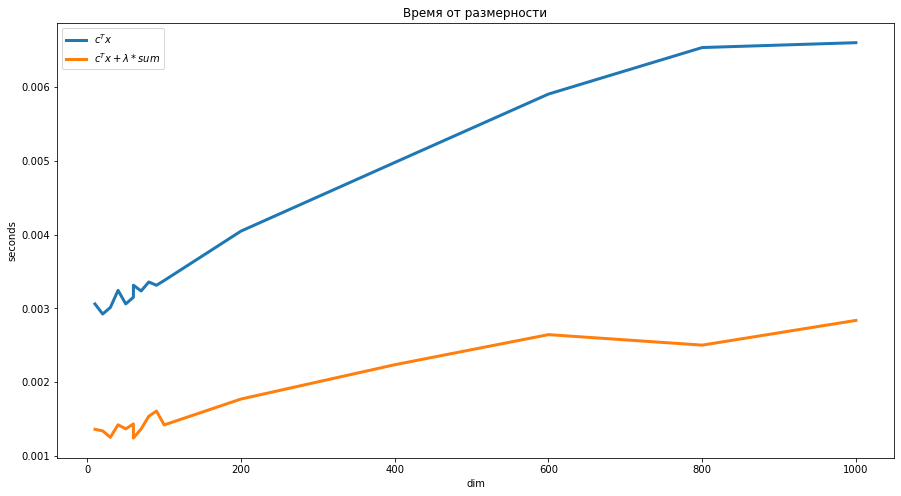

In [200]:
# time from dim

dims = [10, 20, 30, 40, 50, 60, 60, 70, 80, 90, 100, 200, 400, 600, 800, 1000]
iters = 100

times_1 = np.zeros(len(dims))
times_2 = np.zeros(len(dims))
times_3 = np.zeros(len(dims))

iterations_1 = np.zeros(len(dims))
iterations_2 = np.zeros(len(dims))


for i in range(len(dims)):
    n = dims[i]
    mean_time_1 = 0
    mean_time_2 = 0
    mean_time_3 = 0
    
    mean_iterations_1 = 0
    mean_iterations_2 = 0
    for j in range(iters):
        f_1, g_1 = get_f_g_1(n)
        f_2, g_2 = get_f_g_2(n)
        
        res_1 = mirror_descent(n, f_1, g_1, 0.1)
        res_2 = mirror_descent(n, f_2, g_2, 0.1)
        
        mean_time_1 += res_1.time
        mean_time_2 += res_2.time
        
        mean_iterations_1 += res_1.values.size
        mean_iterations_2 += res_1.values.size
        
    
    mean_time_1 /= iters
    mean_time_2 /= iters
    
    times_1[i] = mean_time_1
    times_2[i] = mean_time_2
    
    iterations_1 /= iters
    iterations_2 /= iters
    
plt.figure(figsize=(15, 8))
plt.title("Время от размерности")
# plt.plot(dims, times_1, label=r"$c^Tx$", linewidth=3)
# plt.plot(dims, times_2, label=r"$c^Tx + \lambda * sum$", linewidth=3)
plt.plot(dims, iterations_1, label=r"$c^Tx$", linewidth=3)
plt.plot(dims, iterations_2, label=r"$c^Tx + \lambda * sum$", linewidth=3)
plt.xlabel('dim')
plt.ylabel('seconds')
plt.legend()
plt.show()